## PROJET DATA - ANALYSES DES MEILLEURS JOUEURS D'ÉCHECS POUR UN GRAND TOURNOI

# Infos générales et objectifs

J'ai préféré faire le travail avec mon propre csv. Vu que je suis passionné d'échecs, j'ai choisi de changer la problématique du projet data, pour qu'elle soit autour des joueurs d'échecs plutôt que des animés.

NOUVELLE PROBLEMATIQUE : Je vais analyser le top 100 des joueurs mondiaux pour aider le comité d'organisation d'un grand tournoi d'échecs à sélectionner les 15 meilleurs profils pour le tournoi, et à les segmenter en catégories (têtes d'affiche, valeurs sûres, talents volatiles, à éviter).

Les Données Disponibles sur chaque joueur : 
- Rang du joueur
- Nom du joueur
- Pays
- Elo actuel (points de classement)
- Peak Elo (maximum all time)
- Nombre de parties officielles
- Win rate du joueur
- Draw rate du joueur (parties nulles)
- Loss rate du joueur
- Précision moyenne des parties du joueur
- Âge du joueur
- Titre du joueur (Grand-maître(GM), Maître international(MI))
- Style de jeu (Agressif, défensif, positionnel, hybride)
- Nombre d'années en tant que pro

La df est déjà clean. Certaines données restent fictives car introuvables, mais j'ai rendu l'ensemble cohérent et probablement proche de la réalité, vu que ce n'est qu'un exercice. Chaque joueur de la df existe vraiment.


J'ai donc remplacé les 4 hypotèses à tester : 

H1 : L'Elo actuel seul est insuffisant pour sélectionner les joueurs.
Un joueur peut avoir un très haut Elo mais être très instable (grand écart entre Peak et Elo actuel Pour un grand tournoi, on veut des joueurs fiables et pas seulement forts).

H2 : Les joueurs les plus âgés sont moins réguliers que les jeunes.
On pourrait croire que les joueurs vétérans (> 40 ans) sont en déclin et donc moins stables que les jeunes talents en progression.

H3 : Les joueurs agressifs ont un Win Rate plus élevé que les défensifs.
Les joueurs agressifs cherchent la victoire, donc on pourrait s'attendre à ce qu'ils aient un Win_Rate plus élevé.

H4 : Un score composite permet une segmentation pratique pour l'organisateur.
En combinant Elo, Régularité et Spectacle, on peut créer des catégories claires pour adapter la stratégie du tournoi (marketing, invitations, etc.).  En gros avec le score composite, l'organisateur peut identifier des "têtes d'affiches", des "valeurs sûres", des "talents volatiles/prometteurs", ou alors des joueurs "non recommandés" qu'il ne faut pas inviter.







# 1. Setup des outils et du fichier .csv

J'importe les outils et configure le style des graphiques

In [270]:
#J'importe mes outils
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuration graphyques style
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True



Je charge le dataframe et fais un .head() pour voir si ça marche bien

In [ ]:
    # Charger le dataframe
df = pd.read_csv("top_100_chess_players_2026 - Projet DATA.csv")

# Explorer le datframe
print(f"nombre de joueurs : {len(df)}")
print("Aperçu du dataset :")
display(df.head())

nombre de joueurs : 100
Aperçu du dataset :


,Rang,Joueur,Pays,Elo_Actuel,Peak_Elo,Nb_Parties_Officielles,Win_Rate,Draw_Rate,Loss_Rate,Precision_Moyenne,Age,Titre,Style_Jeu,Annees_Pro
0,1,Magnus Carlsen,Norway,2839,2882,3847,51.2,35.8,13.0,92.5,34,GM,Agressif,17
1,2,Hikaru Nakamura,United States,2816,2816,2956,48.3,38.4,13.3,90.2,37,GM,Hybride,22
2,3,Fabiano Caruana,United States,2789,2844,3102,42.5,46.3,11.2,91.8,33,GM,Positionnel,20
3,4,Arjun Erigaisi,India,2773,2801,1847,52.1,33.2,14.7,89.6,22,GM,Agressif,8
4,5,Rameshbabu Praggnanandhaa,India,2771,2785,1623,50.8,34.6,14.6,90.1,20,GM,Hybride,6


# 2. Vérifications et nettoyage

Je regrde les stats générales avec .describe(), et les infos sur les colonnes avec .info()

In [272]:
#J'affiche les statistiques principales
print(" Statistiques principales :")
display(df.describe().round(2))

#J'affiche le nb de lignes, la liste des colonnes et leur types
print("\n Infos sur les colonnes :\n ")
display(df.info())

 Statistiques principales :


,Rang,Elo_Actuel,Peak_Elo,Nb_Parties_Officielles,Win_Rate,Draw_Rate,Loss_Rate,Precision_Moyenne,Age,Annees_Pro
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,50.50,2684.16,2748.19,2074.19,45.79,44.60,9.60,90.44,30.94,16.82
std,29.01,46.73,35.86,840.29,3.15,6.19,3.34,1.14,9.32,9.07
min,1.00,2630.00,2670.00,456.00,38.80,30.10,2.20,87.60,14.00,2.00
25%,25.75,2646.00,2720.00,1456.00,43.68,40.58,6.90,89.60,24.00,9.75
50%,50.50,2666.50,2745.00,1923.00,45.90,45.45,8.85,90.60,29.50,16.00
75%,75.25,2717.25,2765.00,2622.50,47.52,49.72,12.05,91.20,37.00,22.25
max,100.00,2839.00,2882.00,4123.00,52.40,59.00,17.50,93.40,57.00,43.00



 Infos sur les colonnes :
 
<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rang                    100 non-null    int64  
 1   Joueur                  100 non-null    str    
 2   Pays                    100 non-null    str    
 3   Elo_Actuel              100 non-null    int64  
 4   Peak_Elo                100 non-null    int64  
 5   Nb_Parties_Officielles  100 non-null    int64  
 6   Win_Rate                100 non-null    float64
 7   Draw_Rate               100 non-null    float64
 8   Loss_Rate               100 non-null    float64
 9   Precision_Moyenne       100 non-null    float64
 10  Age                     100 non-null    int64  
 11  Titre                   100 non-null    str    
 12  Style_Jeu               100 non-null    str    
 13  Annees_Pro              100 non-null    int64  
dtypes: float64(4), int64(6), 

None

Je vérifie le nombre de valeurs manquantes par colonnes avec .isna()

In [273]:
#Je vérifie le nombre de valeurs manquantes par colonnes avec .isna(), et .sum() m'affiche le total de true par colonnes
valeurs_manquantes = df.isna().sum()
print(valeurs_manquantes)

#Printer le reultat
if valeurs_manquantes.sum() == 0:
    print("Pas de valeur manquante.")
elif valeurs_manquantes.sum() > 0:
    print(f"Nombre de valeurs manquantes : {valeurs_manquantes.sum()}")

Rang                      0
Joueur                    0
Pays                      0
Elo_Actuel                0
Peak_Elo                  0
Nb_Parties_Officielles    0
Win_Rate                  0
Draw_Rate                 0
Loss_Rate                 0
Precision_Moyenne         0
Age                       0
Titre                     0
Style_Jeu                 0
Annees_Pro                0
dtype: int64
Pas de valeur manquante.


Je vérifie si il y a des doublons avec .duplicated()

In [274]:
#Je vérifie si il y a des doublons avec .duplicated(), et .sum() m'affiche le total de true (.duplicated() donne True quand il voit une ligne dupliquée))
nb_doublons = df.duplicated().sum()
print(f"Nombre de doublons : {nb_doublons}")

Nombre de doublons : 0


Je mets le nom des joueurs en majuscule avec .upper()

In [275]:
# Mettre les noms des joueurs en majuscules avec .upper()
Joueur_majuscules = df['Joueur'].str.upper()

print("Noms en majuscules :")
print(Joueur_majuscules.head(10).to_string())

Noms en majuscules :
0               MAGNUS CARLSEN
1              HIKARU NAKAMURA
2              FABIANO CARUANA
3               ARJUN ERIGAISI
4    RAMESHBABU PRAGGNANANDHAA
5             ALIREZA FIROUZJA
6                   ANISH GIRI
7               VINCENT KEYMER
8                    WESLEY SO
9                       WEI YI


Je change la donnée "GM" par "Grand Maître" et "MI" par "Maître International" dans la colonne "Titre" avec .replace() pour qua ça soit plus compréhensible

In [276]:
print("La colonne Titre avant la modif :")
print(df['Titre'].head().to_string())

#Je change la donnée "GM" par "Grand Maître" et "MI" par "Maître International" dans la colonne "Titre" avec .replace()
#(Il n'y a que des GM dans le top 100, mais je fais ça pour l'exemple)
df['Titre'] = df['Titre'].replace({'GM': 'Grand-Maître', 'MI': 'Maître International'})

print("\n La colonne Titre après la modif :")
print(df['Titre'].head().to_string())

La colonne Titre avant la modif :
0    GM
1    GM
2    GM
3    GM
4    GM

 La colonne Titre après la modif :
0    Grand-Maître
1    Grand-Maître
2    Grand-Maître
3    Grand-Maître
4    Grand-Maître


# 3. Graphiques et exploration

Je vais maintenant faire quelques graphiques de mes données pour avoir une vue d'ensemble sur des stats importantes. 
- Le ELO actuel des joueurs, histogramme
- Les styles de jeu qui "dominent" le top 100, diagramme
- La corrélation entre le ELO d'un joueur et son winrate: nuage de points
- La corrélation entre le ELO d'un joueur et sa précision en parties, nuage de pounts

Histogramme du Elo actuel des joueurs :

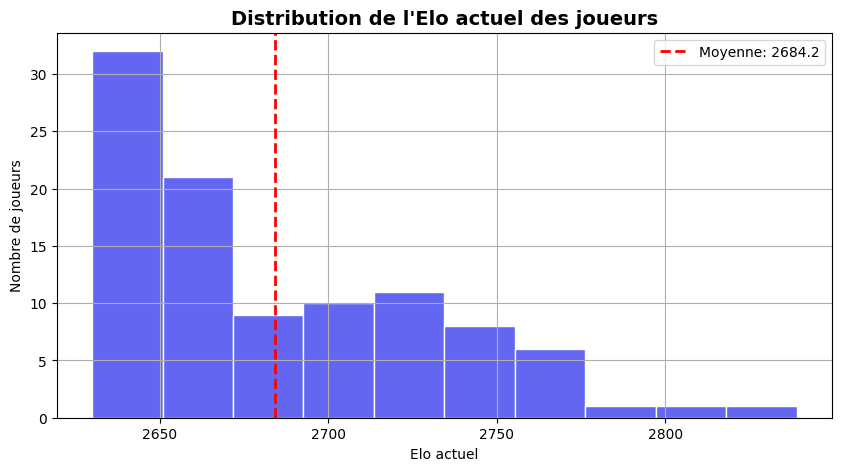

Statistiques sur l'Elo actuel :
Elo moyen : 2684.16
Elo minimum : 2630
Elo maximum : 2839
Elo médian : 2666.5


In [277]:

# Histogramme du Elo actuel des joueurs
plt.figure(num='Graph 1', figsize=(10, 5))

plt.hist(df['Elo_Actuel'], bins=10, color='#6366f1', edgecolor='white')

# Ajouter la moyenne
moyenne = df['Elo_Actuel'].mean()

# Ajouter la moyenne visuellement
plt.axvline(moyenne, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {moyenne:.1f}')

# Ajouter les labels et le titre
plt.title("Distribution de l'Elo actuel des joueurs", fontsize=14, fontweight='bold')
plt.xlabel("Elo actuel")
plt.ylabel("Nombre de joueurs")
plt.legend()
plt.show()

# Commentaires sur le Elo moyen, minimum, maximum et l'écart-type
print("Statistiques sur l'Elo actuel :")
print(f"Elo moyen : {df['Elo_Actuel'].mean()}")
print(f"Elo minimum : {df['Elo_Actuel'].min()}")
print(f"Elo maximum : {df['Elo_Actuel'].max()}")
print(f"Elo médian : {df['Elo_Actuel'].median()}")


Diagramme des styles de jeu qui "dominent" le top 100 :

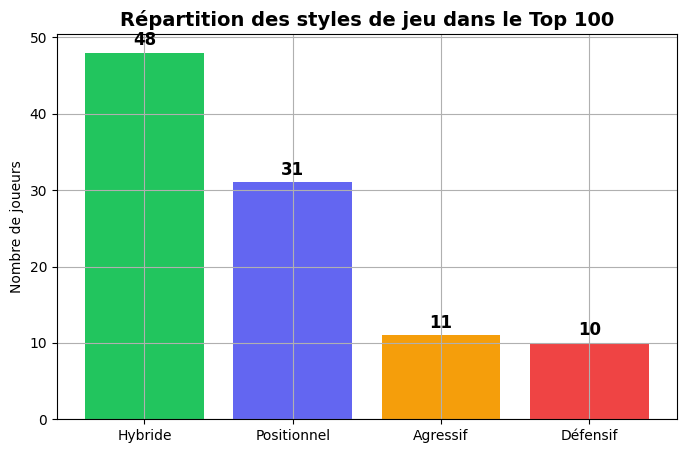

In [278]:
# Compter les styles de jeu
style_counts = df['Style_Jeu'].value_counts()

# Crée le graphique
plt.figure(figsize=(8, 5))
couleurs = ['#22c55e', '#6366f1', '#f59e0b', '#ef4444']
bars = plt.bar(style_counts.index, style_counts.values, color=couleurs[:len(style_counts)])

# Ajouter les valeurs sur les barres
for bar, val in zip(bars, style_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, str(val), ha='center', fontweight='bold', fontsize=12)

plt.title("Répartition des styles de jeu dans le Top 100", fontsize=14, fontweight='bold')
plt.ylabel("Nombre de joueurs")
plt.show()


Corrélation entre le ELO d'un joueur et son winrate + nuage de points :

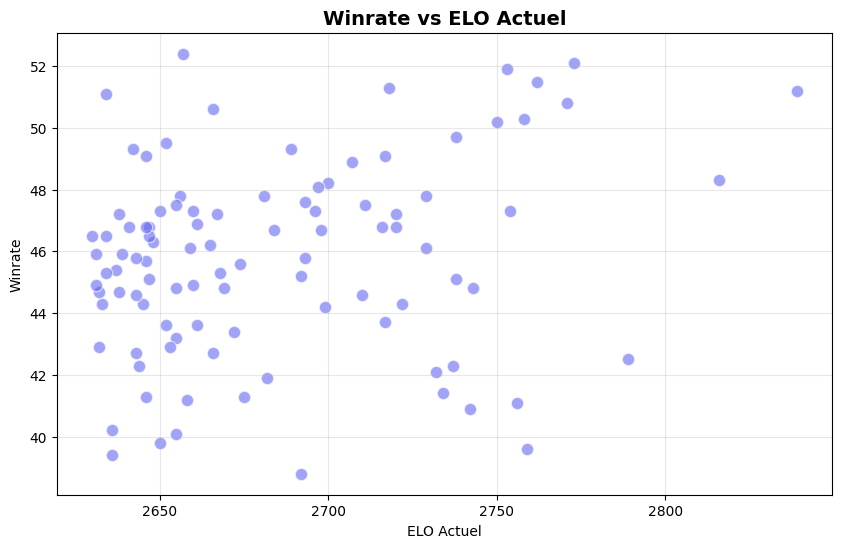

Corrélation ELO vs Winrate : 0.23696304384530126
Corrélation POSITIVE faible : Un ELO plus élevé peut indiquer un légèrement meilleur winrate.


In [279]:
# Nuage de points
plt.figure(figsize=(10, 6))

plt.scatter(df['Elo_Actuel'], df['Win_Rate'], alpha=0.6, c='#6366f1', s=80, edgecolor='white')

plt.title("Winrate vs ELO Actuel", fontsize=14, fontweight='bold')
plt.xlabel("ELO Actuel")
plt.ylabel("Winrate")
plt.grid(True, alpha=0.3)
plt.show()



#Corrélation entre le ELO d'un joueur et son winrate :
corr = df['Elo_Actuel'].corr(df['Win_Rate'])
print(f"Corrélation ELO vs Winrate : {corr}")

# Interprétation de la corrélation :
if corr > 0.5:
    print(" Corrélation POSITIVE forte : Un ELO plus élevé veut souvent dire un meilleur winrate.")
elif corr > 0:
    print("Corrélation POSITIVE faible : Un ELO plus élevé peut indiquer un légèrement meilleur winrate.")
else:
    print("Corrélation NÉGATIVE : Un ELO plus élevé indique un winrate plus faible.")

Corrélation entre le ELO d'un joueur et sa précision en parties + nuage de points :

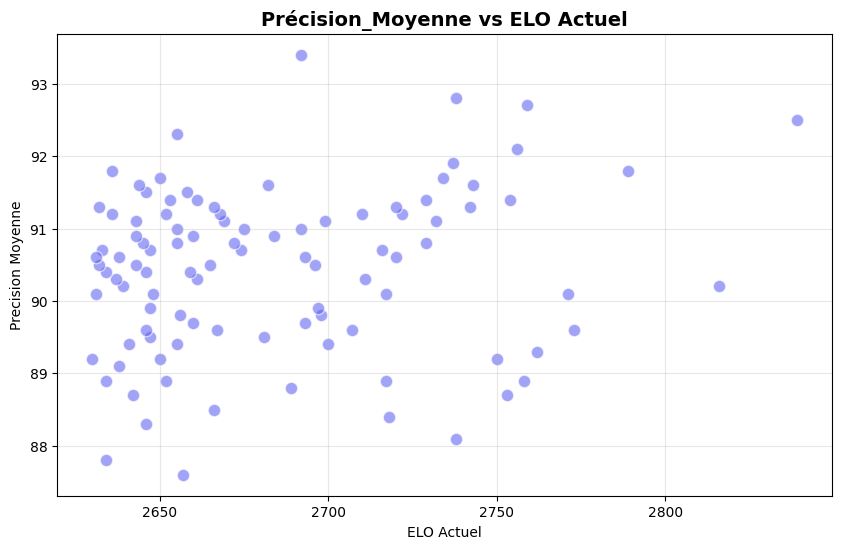

Corrélation ELO vs Précision Moyenne : 0.16983921067137558
Corrélation POSITIVE faible : Un ELO plus élevé peut indiquer une légèrement meilleure précision moyenne.


In [280]:
# Nuage de points
plt.figure(figsize=(10, 6))

plt.scatter(df['Elo_Actuel'], df['Precision_Moyenne'], alpha=0.6, c='#6366f1', s=80, edgecolor='white')

plt.title("Précision_Moyenne vs ELO Actuel", fontsize=14, fontweight='bold')
plt.xlabel("ELO Actuel")
plt.ylabel("Precision Moyenne")
plt.grid(True, alpha=0.3)
plt.show()




#Corrélation entre le ELO d'un joueur et sa précison moyenne :
corr = df['Elo_Actuel'].corr(df['Precision_Moyenne'])
print(f"Corrélation ELO vs Précision Moyenne : {corr}")

# Interprétation de la corrélation :
if corr > 0.5:
    print(" Corrélation POSITIVE forte : Un ELO plus élevé veut souvent dire une meilleure précision moyenne.")
elif corr > 0:
    print("Corrélation POSITIVE faible : Un ELO plus élevé peut indiquer une légèrement meilleure précision moyenne.")
else:
    print("Corrélation NÉGATIVE : Un ELO plus élevé indique une précision moyenne plus faible.")

# 4. Construction du score de fiabilité

Un peu comme pour le projet des animes, je vais créer un moyen d'avoir un score composite de fiabilité des joueurs, car leur Elo seul ne suffit pas pour savoir si il faut l'inviter au tournoi : Il peut aussi être très instable, jouer avec peu de précision, ou avoir un style ennuyeux et faire beaucoup de parties nulles.

Solution : Créer un Score_Fiabilite qui combine 4 les variables :

- Elo_Actuel : Niveau du joueur
- Ecart Peak_Elo : Elo_Actuel : Régularité du joueur
- Précision_Moyenne : Qualité de jeu du joueur
- Spectacle (Style_Jeu + Draw_Rate): Est-ce que le joueur est intéressant à regarder


## Construction des features
Je vais construire les features de base qui me serviront ensuite à faire ce score de fiabilité des joueurs.

Les features : 
1. L'écart de performance (La volatilité du joueur)
2. La régularité (c'est l'inverse)
3. Le "Spectacle" (Une feature un peu fun que j'ai fat en basant sur le WinRate du joueur et son style de jeu (Agressif = plus spectaculaire, Défensif = moins spectaculaire, etc...)).

### Feature 1 : Ecart de performance

In [281]:
# Feature 1 : Écart de performance (volatilité)
df['Ecart_Performance'] = df['Peak_Elo'] - df['Elo_Actuel']

#Afficher les 10 joueurs avec les plus grands ecarts de perf (du plus grand ecart au plus petit) (les joueurs irréguliers en gros):
print("Les 10 joueurs les plus irréguliers :")
joueurs_irréguliers = df.sort_values('Ecart_Performance', ascending=False).head(10)
display(joueurs_irréguliers[['Joueur', 'Peak_Elo', 'Elo_Actuel', 'Ecart_Performance']])

Les 10 joueurs les plus irréguliers :


,Joueur,Peak_Elo,Elo_Actuel,Ecart_Performance
90,Boris Gelfand,2777,2636,141
64,Alexander Grischuk,2778,2655,123
95,Yuriy Kryvoruchko,2751,2632,119
89,Alexei Shirov,2755,2636,119
76,Michael Adams,2761,2646,115
79,Francisco Vallejo Pons,2755,2644,111
68,Alexander Morozevich,2758,2650,108
58,Pavel Eljanov,2765,2658,107
97,Aryan Tari,2738,2631,107
65,David Navara,2752,2653,99


### Feature 2 : Régularité

In [282]:
# Feature 2 : Régularité (inverse de l'écart)
df['Regularite'] = 10 - (df['Ecart_Performance'] / 10)

#Afficher les 10 joueurs les plus réguliers :
print("Les 10 joueurs les plus réguliers :")
joueurs_réguliers = df.sort_values('Regularite', ascending=False).head(10)
display(joueurs_réguliers[['Joueur', 'Peak_Elo', 'Elo_Actuel', 'Ecart_Performance']])

Les 10 joueurs les plus réguliers :


,Joueur,Peak_Elo,Elo_Actuel,Ecart_Performance
1,Hikaru Nakamura,2816,2816,0
15,Hans Moke Niemann,2745,2738,7
9,Wei Yi,2763,2754,9
59,Yagiz Kaan Erdogmus,2670,2657,13
4,Rameshbabu Praggnanandhaa,2785,2771,14
7,Vincent Keymer,2776,2758,18
14,Leinier Dominguez,2757,2738,19
6,Anish Giri,2780,2759,21
20,Le Quang Liem,2754,2729,25
23,Vladimir Fedoseev,2745,2720,25


### Feature 3 : Le spectacle

Feature qui combine le style d'un joueur et son drawrate.

Chaque style donne plus ou moins de points :
- Agressif = 9
- Hybride = 7
- Défensif/Positionnel = 5

Ensuite on applique le drawrate (Plus un joueur fait de draws moins il est spectaculaire)

In [283]:
# Feature 3 : Le spectacle
#C'est une feature plus complexe donc je vais bcp plus détailler

# j'initialise la colonne à 0
df['Base_Spectacle'] = 0

# J'assigne les valeurs selon le style de jeu avec loc[] (affecte des lignes et colonnes par des etiquettes):
# Agressif = 9
df.loc[df['Style_Jeu'] == 'Agressif', 'Base_Spectacle'] = 9

# Hybride = 7
df.loc[df['Style_Jeu'] == 'Hybride', 'Base_Spectacle'] = 7

# Défensif ou Positionnel = 5
df.loc[df['Style_Jeu'] == 'Défensif', 'Base_Spectacle'] = 5
df.loc[df['Style_Jeu'] == 'Positionnel', 'Base_Spectacle'] = 5



#Ensuite je calcule la pénalité selon le drawrate
# La formule est donc : Pénalité = (Draw_Rate - 30) × 0.05
# Si Draw_Rate < 30, pénalité = 0

#EXPLIATIOB DE LA FORMULE :
#On va dire qu'en dessous de 30% de drawrate, on ne met pas de pénalité.
# Le "0.05" correspond à la "force de la pénalité". Chaque point de Draw_Rate au-dessus de 30 enlève 0.05 points.
# Plus tu fais de draws, plus tu perds des points spectacle.

df['Penalite_Draw'] = (df['Draw_Rate'] - 30) * 0.05

# Remplacer les valeurs négatives par 0(= pas de pénalité si Draw Rate < 30%)
df.loc[df['Penalite_Draw'] < 0, 'Penalite_Draw'] = 0


#CALCUL DU SCORE DE SPECTACLE FINAL :
# Score = Base - Pénalité
df['Facteur_Spectacle'] = df['Base_Spectacle'] - df['Penalite_Draw']

# Forcer le score à rester entre 3 et 10:
# Si < 3 alors mettre 3
df.loc[df['Facteur_Spectacle'] < 3, 'Facteur_Spectacle'] = 3

# Si > 10 alors mettre 10
df.loc[df['Facteur_Spectacle'] > 10, 'Facteur_Spectacle'] = 10


#Afficher les 10 joueurs les plus spectaculaires du plus spectaculaire au moins spectaculaire:
print("Top 10 des joueurs les plus spectaculaires :")
j_spectaculaires = df.sort_values('Facteur_Spectacle', ascending=False).head(10)
display(j_spectaculaires[['Joueur', 'Style_Jeu', 'Win_Rate', 'Draw_Rate', 'Facteur_Spectacle']])

Top 10 des joueurs les plus spectaculaires :


,Joueur,Style_Jeu,Win_Rate,Draw_Rate,Facteur_Spectacle
59,Yagiz Kaan Erdogmus,Agressif,52.4,30.1,8.995
92,Ediz Gurel,Agressif,51.1,31.4,8.930
24,Javokhir Sindarov,Agressif,51.3,32.7,8.865
5,Alireza Firouzja,Agressif,51.5,32.8,8.860
3,Arjun Erigaisi,Agressif,52.1,33.2,8.840
10,Gukesh Dommaraju,Agressif,51.9,33.4,8.830
51,Volodar Murzin,Agressif,50.6,34.2,8.790
40,Nodirbek Yakubboev,Agressif,49.3,35.6,8.720
0,Magnus Carlsen,Agressif,51.2,35.8,8.710
15,Hans Moke Niemann,Agressif,49.7,36.4,8.680


## Construction du score composite

Maintenant que j'ai fait les features je peux construire mon score de fiabilité des joueurs avec. 

Le score repose sur 3 variables : 
1. Le Elo_Actuel = 50% du score (si le joueur est assez fort)
    Je normalise le Elo_Actuel des joueurs en le divisant par 300. Ca donne un chiffre entre 8,77 (pour le pire joueur du top 100 à 2630) et 9.46 (pour le meilleur à 2839). Comme ça maintenant l'Elo est à une échelle comparable aux autres variables.

2. Régularité = 35% du score (si il est stable)
    La variable "Regularite" est entre 1 et 10, donc elle est déjà normalisée.
    Au final la variable "Ecart de performance" m'a juste servi à montrer les joueurs les plus volatiles.

3. Le spectacle = 15% du score (si il est intéressant à regarder)
    Pour rappel a variable spectavle est basée sur le style de jeu du joueur, et son drawrate. Elle est déjà normalisée entre 3 et 10. 

LA FORMULE : Score_Fiabilite = 0.50 × (Elo_Actuel/300) + 0.35 × Regularite + 0.15 × Facteur_Spectacle

In [ ]:
# Calcul du Score_Fiabilite

# Pondérations
#0.50 = Niveau
#0.35 = Régularité
#0.15 = Spectacle

# Calcul du score fiabilité
df['Score_Fiabilite'] = (0.50 * (df['Elo_Actuel'] / 300) + 0.35 * df['Regularite'] + 0.15 * df['Facteur_Spectacle'])

#Quelques stats bonus sur le Score_Fiabilite (je rajoute ":.2f" pour arrondir au centième) :
print("Statistiques du Score_Fiabilite :")
print(f"Score moyen : {df['Score_Fiabilite'].mean():.2f}")
print(f"Score minimum : {df['Score_Fiabilite'].min():.2f}")
print(f"Score maximum : {df['Score_Fiabilite'].max():.2f}")

print("\nTOP 15 DES JOUEURS PAR SCORE DE FIABILITÉ :")

top_15_fiabilite = df.sort_values('Score_Fiabilite', ascending=False).head(15)
display(top_15_fiabilite[['Rang', 'Joueur', 'Pays', 'Elo_Actuel', 'Regularite', 'Facteur_Spectacle', 'Score_Fiabilite']])   

Statistiques du Score_Fiabilite :
Score moyen : 6.58
Score minimum : 3.54
Score maximum : 9.18

TOP 15 DES JOUEURS PAR SCORE DE FIABILITÉ :


,Rang,Joueur,Pays,Elo_Actuel,Regularite,Facteur_Spectacle,Score_Fiabilite
1,2,Hikaru Nakamura,United States,2816,10.0,6.580,9.180333
15,16,Hans Moke Niemann,United States,2738,9.3,8.680,9.120333
59,60,Yagiz Kaan Erdogmus,Turkey,2657,8.7,8.995,8.822583
9,10,Wei Yi,China,2754,9.1,6.310,8.721500
4,5,Rameshbabu Praggnanandhaa,India,2771,8.6,6.770,8.643833
7,8,Vincent Keymer,Germany,2758,8.2,6.740,8.477667
3,4,Arjun Erigaisi,India,2773,7.2,8.840,8.467667
24,25,Javokhir Sindarov,Uzbekistan,2718,6.8,8.865,8.239750
20,21,Le Quang Liem,Vietnam,2729,7.5,6.040,8.079333
0,1,Magnus Carlsen,Norway,2839,5.7,8.710,8.033167


On voit finalement 


## Graph pour illustrer les 15 meilleurs

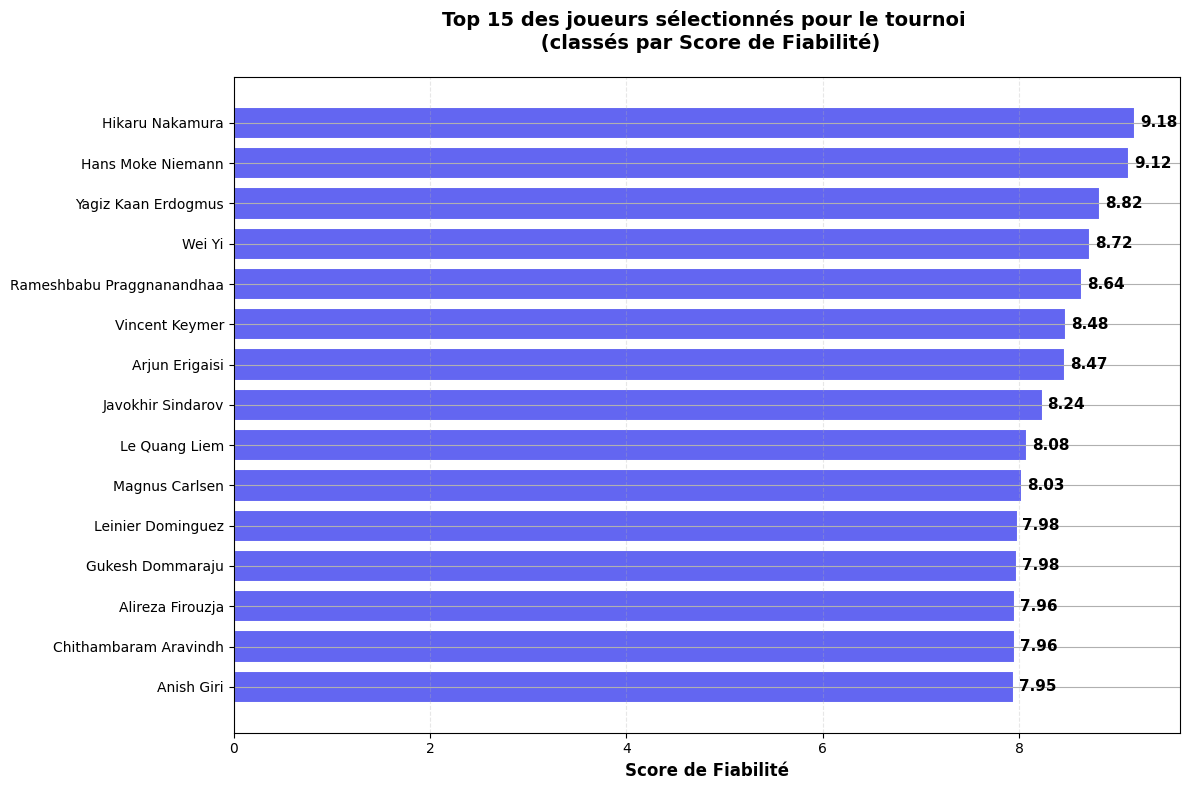

Chaque barre représente un joueur avec son Score de Fiabilité.
Le meilleur joueur (Hikaru Nakamura) a un score de 9.18
Le 15e joueur (Anish Giri) a un score de 7.95



In [285]:
#Graphique du top 15 des joueurs par Score de Fiabilité
plt.figure(figsize=(12, 8))

# J'inverse l'ordre pour avoir le meilleur joueur en haut
top15_inverse = top_15_fiabilite.sort_values('Score_Fiabilite', ascending=True)

# Créer le graphique à barres horizontales
bars = plt.barh(top15_inverse['Joueur'], top15_inverse['Score_Fiabilite'], color='#6366f1', edgecolor='white', linewidth=1.5)

# Ajouter le SCORE à la fin de chaque barre
for i, (score, joueur) in enumerate(zip(top15_inverse['Score_Fiabilite'], top15_inverse['Joueur'])):
    plt.text(score + 0.05, i, f'{score:.2f}', va='center', fontweight='bold', fontsize=11, color='black')

# Titres et labels
plt.xlabel('Score de Fiabilité', fontweight='bold', fontsize=12)
plt.title('Top 15 des joueurs sélectionnés pour le tournoi \n (classés par Score de Fiabilité)', fontsize=14, fontweight='bold', pad=20)

# Grille pour faciliter la lecture
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Ajuster l'espacement
plt.tight_layout()
plt.show()

print("Chaque barre représente un joueur avec son Score de Fiabilité.")
print(f"Le meilleur joueur ({top15_inverse.iloc[-1]['Joueur']}) a un score de {top15_inverse.iloc[-1]['Score_Fiabilite']:.2f}")
print(f"Le 15e joueur ({top15_inverse.iloc[0]['Joueur']}) a un score de {top15_inverse.iloc[0]['Score_Fiabilite']:.2f}\n")

# 5. Vérification des Hypotèses

Pour rappel, voici mes 4 hypotèses, avec comment les tester :

H1 : L'Elo actuel seul est insuffisant pour sélectionner les joueurs.
Un joueur peut avoir un très haut Elo mais être très instable (grand écart entre Peak et Elo actuel Pour un grand tournoi, on veut des joueurs fiables et pas seulement forts).
- Test prévu :
Comparer le Top 15 par Elo_actuel avec le Top 15 par Score_Fiabilite.
Si le classement change alors H1 validée.

H2 : Les joueurs les plus âgés sont moins réguliers que les jeunes.
On pourrait croire que les joueurs vétérans (> 40 ans) sont en déclin et donc moins stables que les jeunes talents en progression.
- Test prévu :
Calculer la corrélation entre Age et Regularite.
Comparer la régularité moyenne des vétérans vs jeunes.

H3 : Les joueurs agressifs ont un Win Rate plus élevé que les défensifs.
Les joueurs agressifs cherchent la victoire, donc on pourrait s'attendre à ce qu'ils aient un Win_Rate plus élevé.
- Test prévu : Comparer le Win_Rate moyen par style de jeu (Agressif vs Hybride vs Défensif).

H4 : Un score composite permet une segmentation pratique pour l'organisateur.
En combinant Elo, Régularité et Spectacle, on peut créer des catégories claires pour adapter la stratégie du tournoi (marketing, invitations, etc.).
- Test prévu :
Définir des seuils sur le Score_Fiabilite pour créer 3 catégories.
Vérifier que chaque catégorie a des caractéristiques distinctes.

### Test H1 : L'Elo actuel seul est insuffisant pour sélectionner les joueurs

In [286]:
#Test H1 : L'Elo actuel seul est insuffisant pour sélectionner les joueurs

# Comparer Top 15 par Elo vs Top 15 par Score_Fiabilite avec .tolist() qui transforme une colonne en liste python
top15_elo = df.sort_values('Elo_Actuel', ascending=False).head(15)
top15_score_joueurs = top_15_fiabilite['Joueur'].tolist()
top15_elo_joueurs = top15_elo['Joueur'].tolist()

joueurs_communs = [j for j in top15_elo_joueurs if j in top15_score_joueurs]

print(f"Résultats :")
print(f"Joueurs identiques : {len(joueurs_communs)}/15")

if len(joueurs_communs) < 15:
    print("H1 valide.")
else:
    print("H1 non valide.")

Résultats :
Joueurs identiques : 10/15
H1 valide.


### Test H2 : Les vétérans (>40 ans) sont moins réguliers que les jeunes (<30 ans)

In [287]:
#H2 : Les vétérans (>40 ans) sont moins réguliers que les jeunes (<30 ans)

# Segmenter par âge
jeunes = df[df['Age'] < 30]
veterants = df[df['Age'] >= 40]

# Régularité moyenne par groupe
reg_jeunes = jeunes['Regularite'].mean()
reg_veterans = veterants['Regularite'].mean()

# Affichage des résultats et comparaison
print(f"Régularité moyenne par groupe d'âge :")
print(f"Jeunes (< 30 ans) : {reg_jeunes:.2f}/10 ({len(jeunes)} joueurs)")
print(f"Vétérans (≥ 40 ans) : {reg_veterans:.2f}/10 ({len(veterants)} joueurs)")
print(f"Différence : {reg_jeunes - reg_veterans:.2f} points")

# Corrélation Age vs Regularite
corr_age_reg = df['Age'].corr(df['Regularite'])
print(f"Corrélation Age vs Régularité : {corr_age_reg:.2f}")

# Interprétation de la corrélation pour H2
if corr_age_reg > 0.5 :
    print("H2 non valide, les vétérans sont plus réguliers que les jeunes.")
elif corr_age_reg < 0.5 and corr_age_reg > 0:
    print("H2 partiellement valide, les vétérans sont légèrement moins réguliers que les jeunes.")
else:
    print("H2 valide, les vétérans sont moins réguliers que les jeunes.")

Régularité moyenne par groupe d'âge :
Jeunes (< 30 ans) : 4.80/10 (50 joueurs)
Vétérans (≥ 40 ans) : 0.95/10 (17 joueurs)
Différence : 3.85 points
Corrélation Age vs Régularité : -0.56
H2 valide, les vétérans sont moins réguliers que les jeunes.


### Test H3 : Les joueurs agressifs ont un meilleur winrate que les autres.

In [288]:
#Test H3 : Les joueurs agressifs ont un meilleur winrate que les autres.

# Win_Rate moyen par style, utilisation de .groupby() qui groupe les données par style de jeu et .agg() pour calculer la moyenne et le compte
# Crée un df indexz par style de jeu avec la moyenne et le compte des Win_Rate
styles_winrate = df.groupby('Style_Jeu')['Win_Rate'].agg(['mean', 'count'])
print(f"Win Rate moyen par style de jeu en %:{styles_winrate}")

win_agressif = df[df['Style_Jeu'] == 'Agressif']['Win_Rate'].mean()
win_defensif = df[df['Style_Jeu'] == 'Défensif']['Win_Rate'].mean()
win_hybride = df[df['Style_Jeu'] == 'Hybride']['Win_Rate'].mean()

print(f"CONCLUSION H3 :")
if win_agressif > max(win_defensif, win_hybride):
    print(f"Les joueurs agressifs ont un winrate PLUS ÉLEVÉ ({win_agressif:.2f}%). HYPOTHÈSE H3 VALIDÉE")
else:
    print(f"   Pas de différence majeure entre les styles. HYPOTHÈSE H3 NON VALIDE")
    print(f"\n💡 Explication possible :")

Win Rate moyen par style de jeu en %:                  mean  count
Style_Jeu                    
Agressif     50.927273     11
Défensif     40.340000     10
Hybride      47.033333     48
Positionnel  43.803226     31
CONCLUSION H3 :
Les joueurs agressifs ont un winrate PLUS ÉLEVÉ (50.93%). HYPOTHÈSE H3 VALIDÉE


### Test H4 : H4 : Un score composite permet une segmentation pratique pour l'organisateur.

In [289]:
#Test H4 : Un score composite permet une segmentation pratique pour l'organisateur
#Je vais segmenter les joueurs en 3 groupes selon leur Score_Fiabilite : Les têtes d'affiche (≥ 8.5), les valeurs sûres (8.0-8.5) et les talents à surveiller (< 8.0).
#Ensuite, checkerai que ces segments sont distincts en comparant leurs moyennes de Elo et de Régularité.

# Segmentation
tetes_affiche = top_15_fiabilite[top_15_fiabilite['Score_Fiabilite'] >= 8.5]
valeurs_sures = top_15_fiabilite[(top_15_fiabilite['Score_Fiabilite'] >= 8.0) & (top_15_fiabilite['Score_Fiabilite'] < 8.5)]
talents = top_15_fiabilite[top_15_fiabilite['Score_Fiabilite'] < 8.0]

#Affiche les résultats de la segmentation
print(f"Segmentation des 15 joueurs :")
print(f"Têtes d'affiche (≥ 8.5) : {len(tetes_affiche)} joueurs")
print(f"Valeurs sûres (8.0-8.5) : {len(valeurs_sures)} joueurs")
print(f"Talents à surveiller (< 8.0) : {len(talents)} joueurs")

#Montre les têtes d'affiche
print(f"\nCATÉGORIE 1 : Têtes d'affiche (Score ≥ 8.5)")
print(f"Nombre : {len(tetes_affiche)} joueurs")
if len(tetes_affiche) > 0:
    print(f"Joueurs : {', '.join(tetes_affiche['Joueur'].tolist())}")

#montre les valeurs sûres
print(f"\nCATÉGORIE 2 : Valeurs sûres (8.0 ≤ Score < 8.5)")
print(f"Nombre : {len(valeurs_sures)} joueurs")
if len(valeurs_sures) > 0:
    print(f"Joueurs : {', '.join(valeurs_sures['Joueur'].tolist())}")

#montre les talents à surveiller
print(f"\nCATÉGORIE 3 : Talents à surveiller (Score < 8.0)")
print(f"Nombre : {len(talents)} joueurs")
if len(talents) > 0:
    print(f"Joueurs : {', '.join(talents['Joueur'].tolist())}")

#Conclusion de la H4
print(f"\nCONCLUSION H4:")

#Calculer le nombre de catégories créees
nb_categories = (len(tetes_affiche) > 0) + (len(valeurs_sures) > 0) + (len(talents) > 0)

if nb_categories >= 2:
    print(f"Les 15 joueurs sont répartis en {nb_categories} catégories.")
    print(f"chaque catégorie a une stratégie marketing différente.")
    print(f" HYPOTHÈSE H4 VALIDÉE")
else:
    print(f"Tous les joueurs sont dans la même catégorie.")
    print(f"HYPOTHÈSE H4 PAS VALIDÉE")

Segmentation des 15 joueurs :
Têtes d'affiche (≥ 8.5) : 5 joueurs
Valeurs sûres (8.0-8.5) : 5 joueurs
Talents à surveiller (< 8.0) : 5 joueurs

CATÉGORIE 1 : Têtes d'affiche (Score ≥ 8.5)
Nombre : 5 joueurs
Joueurs : Hikaru Nakamura, Hans Moke Niemann, Yagiz Kaan Erdogmus, Wei Yi, Rameshbabu Praggnanandhaa

CATÉGORIE 2 : Valeurs sûres (8.0 ≤ Score < 8.5)
Nombre : 5 joueurs
Joueurs : Vincent Keymer, Arjun Erigaisi, Javokhir Sindarov, Le Quang Liem, Magnus Carlsen

CATÉGORIE 3 : Talents à surveiller (Score < 8.0)
Nombre : 5 joueurs
Joueurs : Leinier Dominguez, Gukesh Dommaraju, Alireza Firouzja, Chithambaram Aravindh, Anish Giri

CONCLUSION H4:
Les 15 joueurs sont répartis en 3 catégories.
chaque catégorie a une stratégie marketing différente.
 HYPOTHÈSE H4 VALIDÉE


# 6. CONCLUSION 

A ma grande surprise, les 4 hypotèses ont été validées. J'en conclus donc : 

1. L'Elo actuel seul est insuffisant pour sélectionner les joueurs. La fiabilité est aussi très importante.

2. Les joueurs les plus âgés sont effectivement moins réguliers que les jeunes.

3. Les joueurs agressifs ont effectivement un Win Rate plus élevé que les défensifs.

4. Un Score_Fiabilite comprenant le Elo, la Régularité d'un joueur et son "Spectacle(style de jeu + drawrate)" permet de mieux identifier les joueurs attractifs pour un organisateur, et de les diviser en 3 parties pour son marketing (Têtes d'affiches, valeurs sures, joueurs prometteurs).


Pour ce qui est de l'objectif de base, mon score composite a pu aider l'organisateur à sélectionner les joueurs les plus attractifs pour son tournoi. Voici pour rappel les 15 premiers joueurs selon ce score (Score_Fiabilite) : 

In [290]:
display(top_15_fiabilite[['Rang', 'Joueur', 'Pays', 'Elo_Actuel', 'Regularite', 'Facteur_Spectacle', 'Score_Fiabilite']])

,Rang,Joueur,Pays,Elo_Actuel,Regularite,Facteur_Spectacle,Score_Fiabilite
1,2,Hikaru Nakamura,United States,2816,10.0,6.580,9.180333
15,16,Hans Moke Niemann,United States,2738,9.3,8.680,9.120333
59,60,Yagiz Kaan Erdogmus,Turkey,2657,8.7,8.995,8.822583
9,10,Wei Yi,China,2754,9.1,6.310,8.721500
4,5,Rameshbabu Praggnanandhaa,India,2771,8.6,6.770,8.643833
7,8,Vincent Keymer,Germany,2758,8.2,6.740,8.477667
3,4,Arjun Erigaisi,India,2773,7.2,8.840,8.467667
24,25,Javokhir Sindarov,Uzbekistan,2718,6.8,8.865,8.239750
20,21,Le Quang Liem,Vietnam,2729,7.5,6.040,8.079333
0,1,Magnus Carlsen,Norway,2839,5.7,8.710,8.033167


*(PS: En tant que grand fan du jeu je peux le certifier : Un tel tournoi serait vraiment cool, car ces joueurs sont super divertissants et mettent presque tous le feu sur l'échiquier ! Sauf Anish Giri...)*

# 7. Export du dataset clean

Je fais maintenant un .to_csv pour avoir un export du dataset clean avec les nouvelles features. 

Avant d'exporter le nouveau csv clean, je drop les colonnes "Penalite_Draw", à la fois pour l'exemple mais aussi parce que je ne les veux pas dans mon csv final (elles étaient juste des étapes intermédiaires pour calculer le Facteur_Spectacle).

In [291]:
#drop de la colonne "Base_Spectacle" et "Penalite_Draw"
df = df.drop(columns=["Base_Spectacle", "Penalite_Draw"])

#Export du dataset clean avec les nouvelles features
print("Export du dataset clean avec les nouvelles features :")

# Nom du fichier
nom_fichier = "top_100_chess_players_nouvelles_features_clean.csv"

# Exporter le df dans un fichier CSV
df.to_csv(nom_fichier , index=False, encoding='utf-8')

#Je vérifie l'export en rechargeant le fichier et en affichant les infos principales + un .head()
df_clean=pd.read_csv("top_100_chess_players_nouvelles_features_clean.csv")
display(df_clean.info())
display(df_clean.head(10))

Export du dataset clean avec les nouvelles features :
<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rang                    100 non-null    int64  
 1   Joueur                  100 non-null    str    
 2   Pays                    100 non-null    str    
 3   Elo_Actuel              100 non-null    int64  
 4   Peak_Elo                100 non-null    int64  
 5   Nb_Parties_Officielles  100 non-null    int64  
 6   Win_Rate                100 non-null    float64
 7   Draw_Rate               100 non-null    float64
 8   Loss_Rate               100 non-null    float64
 9   Precision_Moyenne       100 non-null    float64
 10  Age                     100 non-null    int64  
 11  Titre                   100 non-null    str    
 12  Style_Jeu               100 non-null    str    
 13  Annees_Pro              100 non-null    int64  
 14  

None

,Rang,Joueur,Pays,Elo_Actuel,Peak_Elo,Nb_Parties_Officielles,Win_Rate,Draw_Rate,Loss_Rate,Precision_Moyenne,Age,Titre,Style_Jeu,Annees_Pro,Ecart_Performance,Regularite,Facteur_Spectacle,Score_Fiabilite
0,1,Magnus Carlsen,Norway,2839,2882,3847,51.2,35.8,13.0,92.5,34,Grand-Maître,Agressif,17,43,5.7,8.710,8.033167
1,2,Hikaru Nakamura,United States,2816,2816,2956,48.3,38.4,13.3,90.2,37,Grand-Maître,Hybride,22,0,10.0,6.580,9.180333
2,3,Fabiano Caruana,United States,2789,2844,3102,42.5,46.3,11.2,91.8,33,Grand-Maître,Positionnel,20,55,4.5,4.185,6.851083
3,4,Arjun Erigaisi,India,2773,2801,1847,52.1,33.2,14.7,89.6,22,Grand-Maître,Agressif,8,28,7.2,8.840,8.467667
4,5,Rameshbabu Praggnanandhaa,India,2771,2785,1623,50.8,34.6,14.6,90.1,20,Grand-Maître,Hybride,6,14,8.6,6.770,8.643833
5,6,Alireza Firouzja,France,2762,2804,1734,51.5,32.8,15.7,89.3,22,Grand-Maître,Agressif,8,42,5.8,8.860,7.962333
6,7,Anish Giri,Netherlands,2759,2780,2847,39.6,51.9,8.5,92.7,31,Grand-Maître,Défensif,18,21,7.9,3.905,7.949083
7,8,Vincent Keymer,Germany,2758,2776,1456,50.3,35.2,14.5,88.9,20,Grand-Maître,Hybride,6,18,8.2,6.740,8.477667
8,9,Wesley So,United States,2756,2822,2834,41.1,51.7,7.2,92.1,31,Grand-Maître,Défensif,16,66,3.4,3.915,6.370583
9,10,Wei Yi,China,2754,2763,2156,47.3,43.8,8.9,91.4,26,Grand-Maître,Hybride,14,9,9.1,6.310,8.721500


Le fichier.csv  clean a bien été exporté ! il contient bien 100 joueurs et 18 colonnes.

Ce fichier contient :
- Les données originales (Rang, Joueur, Pays, Elo, etc.)
- Les nouvelles features créées : Ecart_Performance, Regularite, Facteur_Spectacle, Score_Fiabilite

Colonnes incluses dans le fichier :
1. Rang
2. Joueur
3. Pays
4. Elo_Actuel
5. Peak_Elo
6. Nb_Parties_Officielles
7. Win_Rate
8. Draw_Rate
9. Loss_Rate
10. Precision_Moyenne
11. Age
12. Titre
13. Style_Jeu
14. Annees_Pro
15. Ecart_Performance
16. Regularite
17. Facteur_Spectacle
18. Score_Fiabilite